# MACHINE LEARNING: AUCROC

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity). It can also be thought of as a plot of the power as a function of the Type I Error of the decision rule (when the performance is calculated from just a sample of the population, it can be thought of as estimators of these quantities). The ROC curve is thus the sensitivity as a function of fall-out. In general, if the probability distributions for both detection and false alarm are known, the ROC curve can be generated by plotting the cumulative distribution function (area under the probability distribution from {\displaystyle -\infty }-\infty  to the discrimination threshold) of the detection probability in the y-axis versus the cumulative distribution function of the false-alarm probability on the x-axis.

ROC analysis provides tools to select possibly optimal models and to discard suboptimal ones independently from (and prior to specifying) the cost context or the class distribution. ROC analysis is related in a direct and natural way to cost/benefit analysis of diagnostic decision making.

The ROC curve was first developed by electrical engineers and radar engineers during World War II for detecting enemy objects in battlefields and was soon introduced to psychology to account for perceptual detection of stimuli. ROC analysis since then has been used in medicine, radiology, biometrics, forecasting of natural hazards, meteorology, model performance assessment, and other areas for many decades and is increasingly used in machine learning and data mining research.

Above introduction is taken from [wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

## Library

Let us load libraries and set up two vectors: The first is **y_test** and the second is **y_test_hat**. Note that **y_test_hat** is created by **y_test** with certain noise introduced. 

As you can imagine, the larger the noise, the further away **y_test_hat** is from **y_test**. The first task is to change the noise and check out the AUC curve.

In [4]:
import numpy as np
verbose = True
plotROC = True
how_many_classes = 2
L = 1000 # this is total amount of sample in data
volatility_of_noise = 0.5 # feel to change 1 to 2, 3, 10, ...
y_test = np.random.binomial(1, 1/2, L)
y_test_hat = y_test + np.random.normal(0, volatility_of_noise, L)

In [5]:
np.concatenate([y_test, y_test_hat]).reshape(2, 1000)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.5669488 , -0.63671591,  0.28454724, ...,  0.85600387,
         0.07677721,  0.95668058]])

## ROCAUC

Let us plot the AUC using **sklearn.metrics** library and plot the visualization using **matplotlib.pyplot**. 

Test AUC: 0.922084482648021 and note that SD in noise is 0.5.


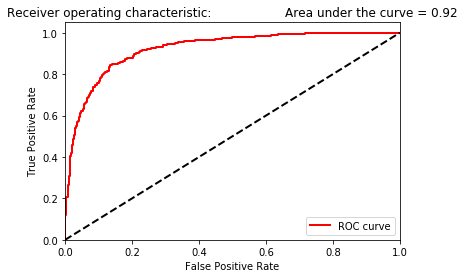

In [6]:
# ROCAUC
if how_many_classes == 2:
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    fpr, tpr, thresholds = roc_curve(y_test, y_test_hat)
    areaUnderROC = auc(fpr, tpr)
    resultsROC = {
        'false positive rate': fpr,
        'true positive rate': tpr,
        'thresholds': thresholds,
        'auc': round(areaUnderROC, 3)
    }
    if verbose:
        print(f'Test AUC: {areaUnderROC} and note that SD in noise is {volatility_of_noise}.')
    if plotROC:
        import matplotlib.pyplot as plt
        plt.figure()
        plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic: \
                  Area under the curve = {0:0.2f}'.format(areaUnderROC))
        plt.legend(loc="lower right")
        plt.show()
else: 
    resultsROC = "Response not in two classes."

## Bonus

Let us try the following: say we have a real data for *y* and we blindly guess *y* to be all 0's. In reality, the guess should not be accurate at all. But how do we know this?

In [7]:
import numpy as np
verbose = True
plotROC = True
how_many_classes = 2
L = 1000 # this is total amount of sample in data
volatility_of_noise = 0.5 # feel to change 1 to 2, 3, 10, ...
y_test = np.random.binomial(1, 1/2, L)
y_test_hat = np.zeros(L)

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_hat)

array([[488,   0],
       [512,   0]])

In [11]:
print(488/(488+512))

0.488


It makes sense the performance is not good. This can be observed from L1 loss (or accuracy) computed from the confusion table. 

But what if we have an imbalanced data?

In [14]:
y_test = np.random.binomial(1, 0.1, L)
y_test_hat = np.zeros(L)
confusion_matrix(y_test, y_test_hat)

array([[889,   0],
       [111,   0]])

In [15]:
print(899/(899+111))

0.8900990099009901


But is the accuracy really 89%? We are not learning anything and we are just guessing all 0's. Intuitively, the performance should be poor.

Test AUC: 0.5 and note that SD in noise is 0.5.


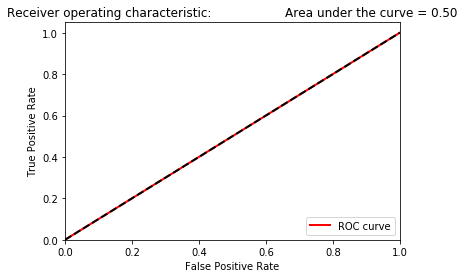

In [16]:
# ROCAUC
if how_many_classes == 2:
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    fpr, tpr, thresholds = roc_curve(y_test, y_test_hat)
    areaUnderROC = auc(fpr, tpr)
    resultsROC = {
        'false positive rate': fpr,
        'true positive rate': tpr,
        'thresholds': thresholds,
        'auc': round(areaUnderROC, 3)
    }
    if verbose:
        print(f'Test AUC: {areaUnderROC} and note that SD in noise is {volatility_of_noise}.')
    if plotROC:
        import matplotlib.pyplot as plt
        plt.figure()
        plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic: \
                  Area under the curve = {0:0.2f}'.format(areaUnderROC))
        plt.legend(loc="lower right")
        plt.show()
else: 
    resultsROC = "Response not in two classes."

Investigation ends here.